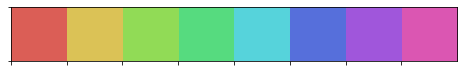

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
%matplotlib inline
sns.set_style()
sns.palplot(sns.color_palette("hls", 8))

import plotly
import plotly.graph_objs as go

In [3]:
data = pd.read_csv('../data/raw/data.csv',index_col=None)

In [4]:
data.head()

,dom_id,pmt_id,pos_x,pos_y,pos_z,dir_x,dir_y,dir_z,tot,time,label
0,321.0,5.0,-17.661,32.245,65.231,-0.460,-0.266,-0.847,26.0,0.0,0
1,1653.0,23.0,11.595,85.465,65.459,-0.955,-0.000,0.296,27.0,0.0,0
2,275.0,9.0,-36.464,67.166,160.189,0.415,0.720,-0.556,26.0,0.0,0
3,1660.0,23.0,61.660,101.635,169.059,-0.955,-0.000,0.296,26.0,0.0,0
4,966.0,16.0,-54.510,-78.323,94.341,-0.827,0.478,-0.296,24.0,0.0,0


# Timeslice Grouping

In order to allow for better visualisations and explorations, the timeslices identified by 15000ns are identified. Attributes are binned into timeslice intervals and assigned a group number starting from 0.

In [4]:
time_range = pd.Series(list(range(0, 1000000000, b)))

In [5]:
len(time_range)

66667

In [6]:
data["group"] = pd.cut(data.time, list(time_range), include_lowest=True, labels=False)

In [10]:
data.to_csv("../data/time_data.csv", index=False)

# General Stats

In [9]:
data[['pos_x', 'pos_y', 'pos_z', 'label', 'time', 'group']].describe()

,pos_x,pos_y,pos_z,label,time,group
count,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07,4.582022e+07
mean,1.168440e-02,-1.597919e-02,1.171977e+02,1.069192e-02,5.005158e+07,3.336272e+03
std,5.125232e+01,6.222670e+01,4.865413e+01,1.028475e-01,2.891125e+07,1.927417e+03
min,-9.462700e+01,-1.156000e+02,3.770000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,-4.501800e+01,-5.792500e+01,7.404100e+01,0.000000e+00,2.500466e+07,1.666000e+03
50%,1.309000e+00,-4.184000e+00,1.217000e+02,0.000000e+00,5.004292e+07,3.336000e+03
75%,4.045200e+01,4.854100e+01,1.602410e+02,0.000000e+00,7.509229e+07,5.006000e+03
max,9.624300e+01,1.050240e+02,1.966110e+02,1.000000e+00,1.015914e+08,6.772000e+03


In [15]:
corr = data.corr()

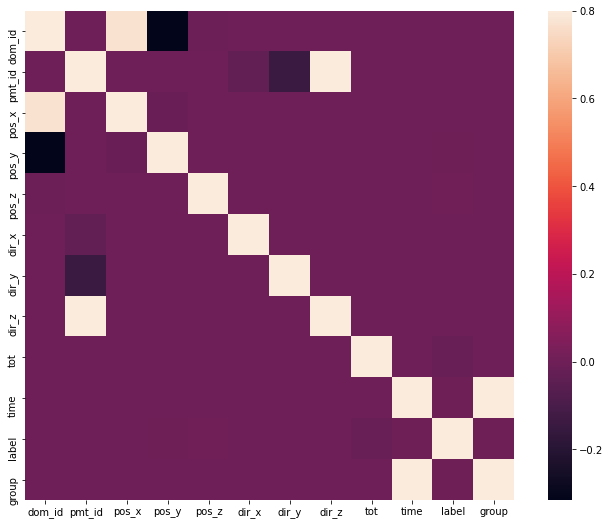

In [17]:
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr,vmax=.8, square=True)

plt.savefig("../assets/correlations.png")

# Null Values

There are no null/na values

In [20]:
data.isna().any().any()

False

# Attribute Exploration

In [21]:
print("\n Unique DOM IDs: {0} \n Unique PMT IDs: {1} \n Unique Labels: {2} \n Unique timeslice groups: {3}".format(len(data.dom_id.unique()),
                                            len(data.pmt_id.unique()),
                                            len(data.label.unique()),
                                            len(data.group.unique())))              


 Unique DOM IDs: 2070 
 Unique PMT IDs: 31 
 Unique Labels: 2 
 Unique timeslice groups: 6759


# Noise:Signal

In [22]:
signal_len = len(data[data.label == 1]) 
noise_len = len(data[data.label == 0]) 
noise_signal_ratio = noise_len / signal_len
print("The noise:signal ratio is noted to be roughly {0}:{1}".format(round(noise_signal_ratio), 1))

The noise:signal ratio is noted to be roughly 93:1


# Groups

## Group by `time` and `group`: 
##### QWhich groups have the most data and what time do they fall under?
Groups 0, 1637, 615 etc have the most data. At the most, group has 12454 points and at the least 1 point. Interestinglt the last few groups (in 6000 range all jave 1 to 2 points only

In [39]:
df_by_group = data[['time', 'group']].groupby(['group']).count().sort_values(by='time', ascending=False)
df_by_group = df_by_group.reset_index()

In [41]:
df_by_group.columns = ['group', 'count']

In [42]:
df_by_group

,group,count
0,0,12454
1,1637,8542
2,615,8483
3,5866,8450
4,5857,8313
...,...,...
6754,6765,1
6755,6766,1
6756,6767,1
6757,6769,1


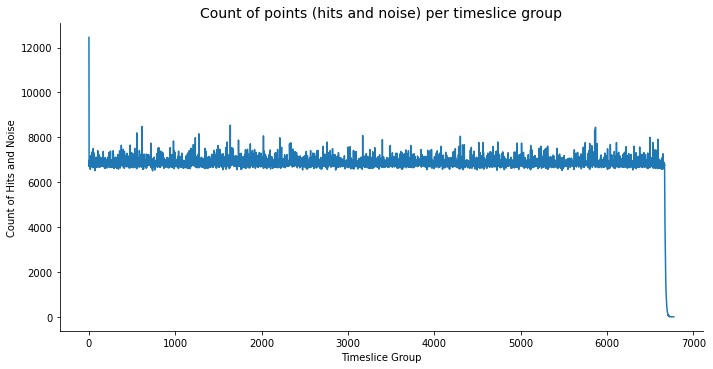

In [81]:
sns.relplot(x="group", y="count", 
            kind="line",
            height=5,
            aspect=2,
            data=df_by_group)
plt.xlabel("Timeslice Group")
plt.ylabel("Count of Hits and Noise")

plt.title("Count of points (hits and noise) per timeslice group",
         y=1, fontsize = 14)

plt.savefig("../assets/points_per_group")

## Group by `group` and `label`:
##### Q1 Which groups have what kind of events?

We can see that group 1 (first timeslice) has highest number of attributes but all noise. Group 1, 6, 9 etc have relatively high hits. Most groups seem to have very low hits given a high noise

##### Q2 Which groups have most number of hits?
Groups 615 (1692), 1637 (1604), 5866 (1589) have the largest amount of hits data


##### TODO:
1. Just Hits vs Noise in the largest timeslice [x]
2. timeslice and hits [x]
3. timeslice and noise [x]
4. timeslice and hits + noise


In [18]:
df_by_label = data[['group', 'label']].groupby(['group', 'label'])['label'].count()

In [147]:
df_by_label[:5]

group  label
0      0        12454
1      0         6728
       1          188
2      0         6803
       1            2
Name: label, dtype: int64

In [54]:
df_only_hits = data[['group', 'label']][data.label == 1].groupby('group')['label'].count().sort_values(ascending=False)
df_only_hits = pd.DataFrame(df_only_hits)
df_only_hits = df_only_hits.reset_index()

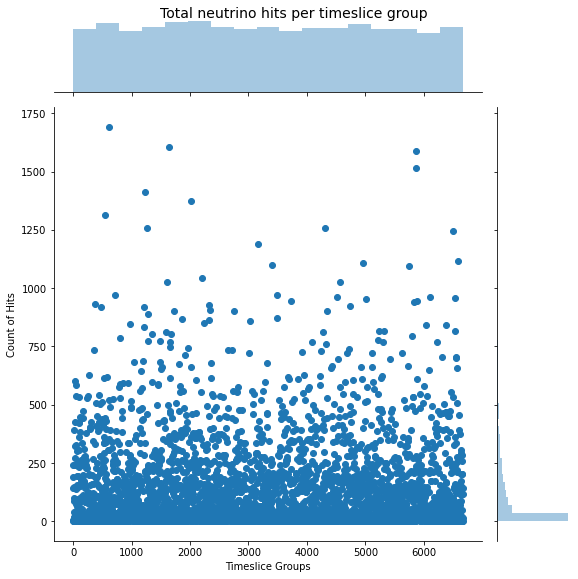

In [83]:
g_only_hits = sns.jointplot(x='group', y="label",
                            height=8,
                            data=df_only_hits)
g_only_hits.set_axis_labels('Timeslice Groups', 'Count of Hits')
g_only_hits.fig.suptitle("Total neutrino hits per timeslice group", 
                        y=1, fontsize = 14)

plt.savefig("../assets/hits_by_group.png")

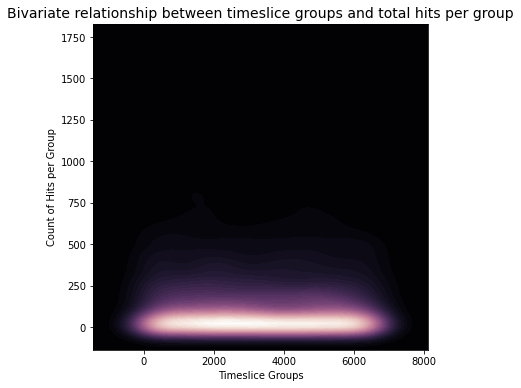

In [96]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df_only_hits.group, df_only_hits.label, cmap=cmap, n_levels=60, shade=True)
ax.set_xlabel("Timeslice Groups")
ax.set_ylabel("Count of Hits per Group")
ax.set_title("Bivariate relationship between timeslice groups and total hits per group",
             y=1, fontsize = 14)
plt.savefig("../assets/kde_hits_per_group")

In [67]:
df_only_noise = data[['group', 'label']][data.label == 0].groupby('group')['label'].count().sort_values(ascending=False)
df_only_noise = pd.DataFrame(df_only_noise)
df_only_noise = df_only_noise.reset_index()
df_only_noise

,group,label
0,0,12454
1,3883,7116
2,1048,7101
3,4848,7081
4,1837,7077
...,...,...
6754,6754,1
6755,6743,1
6756,6744,1
6757,6752,1


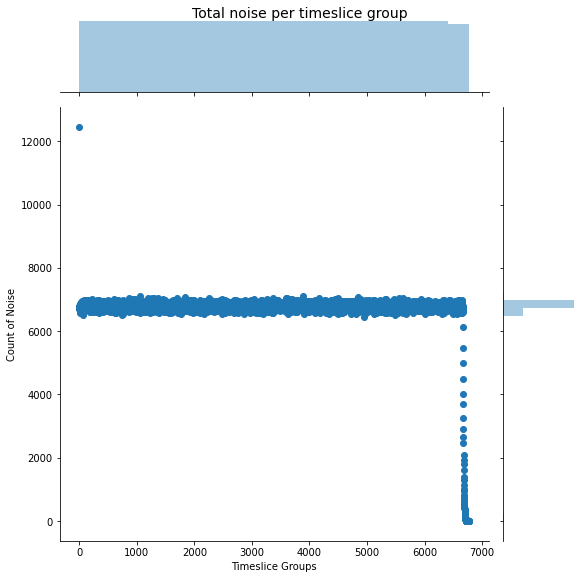

In [88]:
g_only_noise = sns.jointplot(x='group', y="label",
                             height=8,
                             data=df_only_noise)
g_only_noise.set_axis_labels('Timeslice Groups', 'Count of Noise')
g_only_noise.fig.suptitle("Total noise per timeslice group", 
                        y=1, fontsize = 14)

plt.savefig("../assets/noise_by_group.png")

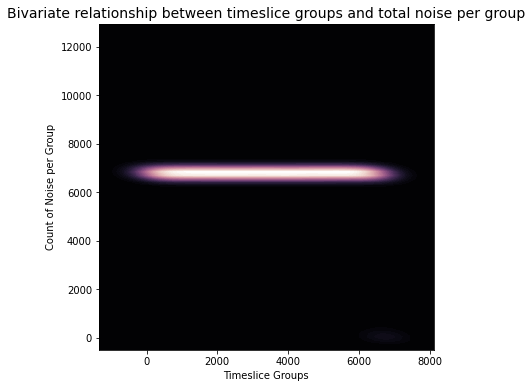

In [97]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df_only_noise.group, df_only_noise.label, cmap=cmap, n_levels=60, shade=True)
ax.set_xlabel("Timeslice Groups")
ax.set_ylabel("Count of Noise per Group")
ax.set_title("Bivariate relationship between timeslice groups and total noise per group",
             y=1, fontsize = 14)
plt.savefig("../assets/kde_noise_per_group")

In [148]:
# groups with higest hits vs noise
highest_hits = df_only_hits.group[:5]

In [149]:
highest_hits_events = data[data['group'].isin(highest_hits)][['time', 'label', 'pos_x']]

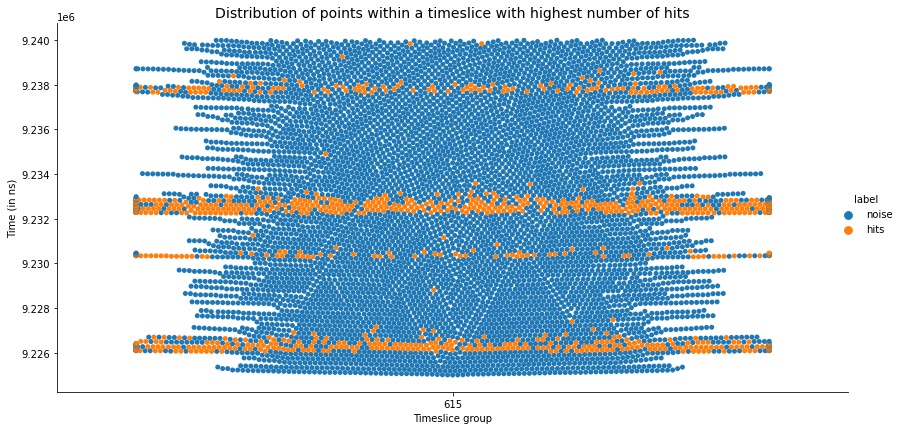

In [103]:
g_highest_hits_noise = sns.catplot(x='group', y="time",
                                   hue='label',
                                   kind="swarm",
                                   data=highest_hits_noise,
                                   aspect=2,
                                   height=6)


g_highest_hits_noise.set_ylabels("Time (in ns)")
g_highest_hits_noise.set_xlabels("Timeslice group")
titles = g_highest_hits_noise.axes.flatten()
titles[0].set_title("Distribution of points within a timeslice with highest number of hits",
                    y=1.5, fontsize=14)
new_labels = ['noise', 'hits']
for t, l in zip(g_highest_hits_noise._legend.texts, new_labels): t.set_text(l)
    
plt.savefig("../assets/top_groups_noise_vs_hits.png")

# Positions `pos_x, pos_y, pos_z`

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data[:30000].pos_x, data[:30000].pos_y, data[:30000].pos_z)

In [ ]:
data_dom = data.groupby(['dom_id']).count()

In [ ]:
data_dom['pmt_id'].sort_values(ascending=False)

data_dom['pmt_id'].sort_values

The Doms with the largest amount of points are chosen for plotting to accommodate for large dataset :
1645, 1239, 1138, 1944, 1719

In [ ]:
# distribution of tot
# tot per label type

In [ ]:
dom_id_list = [1645, 1239, 1138, 1944, 1719]

fig = plt.figure(figsize=(15, 15))
fig.suptitle("Plot of noise and hits for the top 5 Dom IDs")

ax = fig.add_subplot(321, projection='3d')
ax.scatter3D(data[data.dom_id == dom_id_list[0]].pos_x,
             data[data.dom_id == dom_id_list[0]].pos_y,
            data[data.dom_id == dom_id_list[0]].pos_z)
ax.set_title("Distribution of 22747 points for Dom ID 1645")

ax = fig.add_subplot(322, projection='3d')
ax.scatter3D(data[data.dom_id == dom_id_list[1]].pos_x,
             data[data.dom_id == dom_id_list[1]].pos_y,
            data[data.dom_id == dom_id_list[1]].pos_z)
ax.set_title("Distribution of 22658 points for Dom ID 1239")


ax = fig.add_subplot(323, projection='3d')
ax.scatter3D(data[data.dom_id == dom_id_list[2]].pos_x,
             data[data.dom_id == dom_id_list[2]].pos_y,
            data[data.dom_id == dom_id_list[2]].pos_z)
ax.set_title("Distribution of 22649 points for Dom ID 1138")


ax = fig.add_subplot(324, projection='3d')
ax.scatter3D(data[data.dom_id == dom_id_list[3]].pos_x,
             data[data.dom_id == dom_id_list[3]].pos_y,
            data[data.dom_id == dom_id_list[3]].pos_z)
ax.set_title("Distribution of 22642 points for Dom ID 1994")


ax = fig.add_subplot(325, projection='3d')
ax.scatter3D(data[data.dom_id == dom_id_list[4]].pos_x,
             data[data.dom_id == dom_id_list[4]].pos_y,
            data[data.dom_id == dom_id_list[4]].pos_z)
ax.set_title("Distribution of 22613 points for Dom ID 1719")

plt.savefig("../assets/pos_per_dom.png")

## Positions x, y, x for Hits

In [ ]:
hits = data[data['label'] == 1]
hits.head()

In [ ]:
hits_dom = hits.groupby(['dom_id']).count()
hits_dom['pmt_id'].sort_values(ascending=False)

In [ ]:
hits_dom_list = [437, 36]

fig = plt.figure(figsize=(15, 5))
fig.suptitle("Plot of DOMs with Least and Most Hits")

ax = fig.add_subplot(121, projection='3d')
ax.scatter3D(hits[hits.dom_id == hits_dom_list[0]].pos_x,
             hits[hits.dom_id == hits_dom_list[0]].pos_y,
            hits[hits.dom_id == hits_dom_list[0]].pos_z)
ax.set_title("Distribution of 354 points for Dom ID 437")

ax = fig.add_subplot(122, projection='3d')
ax.scatter3D(hits[hits.dom_id == hits_dom_list[1]].pos_x,
             hits[hits.dom_id == hits_dom_list[1]].pos_y,
            hits[hits.dom_id == hits_dom_list[1]].pos_z)
ax.set_title("Distribution of 113 points for Dom ID 36")

plt.savefig("../assets/hitspos_per_dom.png")

# Doms and PMT IDs

(see plots.py)

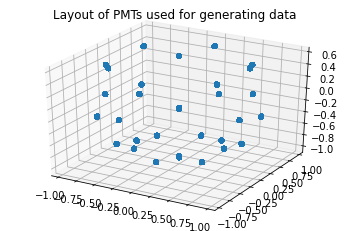

In [115]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data[:10000000].dir_x, data[:10000000].dir_y, data[:10000000].dir_z)
ax.set_title("Layout of PMTs used for generating data")
plt.savefig("../assets/pmt_layout.png")

# ToT
The highest tot value is 209 and associated with a neutrino event. and the lowest is 1 also caused by neutrino event.

In [7]:
data.columns

Index(['dom_id', 'pmt_id', 'pos_x', 'pos_y', 'pos_z', 'dir_x', 'dir_y',
       'dir_z', 'tot', 'time', 'label', 'group'],
      dtype='object')

In [8]:
df_tot = data[['tot', 'label','group', 'time']]

In [9]:
df_tot.head()

,tot,label,group,time
0,26.0,0,0,0.0
1,27.0,0,0,0.0
2,26.0,0,0,0.0
3,26.0,0,0,0.0
4,24.0,0,0,0.0


In [18]:
data.tot.max()

209.0

In [19]:
data[data.tot == 209.0]

,dom_id,pmt_id,pos_x,pos_y,pos_z,dir_x,dir_y,dir_z,tot,time,label,group
40268598,1842.0,19.0,67.073,-22.643,150.841,0.827,-0.478,-0.296,209.0,87990769.0,1,5866


In [17]:
data.tot.min()

1.0

In [27]:
data[data.tot == 5.0].label.unique()

array([1])

In [38]:
df_tot.sort_values(by=['tot'])

,tot,label,group,time
30325002,1.0,1,4417,66269287.0
34808976,1.0,1,5070,76061813.0
7926678,1.0,1,1154,17315959.0
22477295,1.0,1,3273,49097276.0
31369526,1.0,1,4569,68549570.0
...,...,...,...,...
42581921,204.0,1,6203,93051304.0
42581922,205.0,1,6203,93051304.0
45222241,207.0,1,6588,98829558.0
29374047,208.0,1,4279,64190166.0


In [41]:
df_tot.groupby('label').max()

,tot,group,time
label,,,
0,40.0,6772,101591357.0
1,209.0,6665,99986011.0


In [42]:
df_tot.groupby('label').min()

,tot,group,time
label,,,
0,12.0,0,0.0
1,1.0,1,28449.0


In [158]:
highest_tots = df_tot.groupby('group').count().sort_values(by="tot",ascending=False)[:30]
highest_tots = highest_tots.reset_index()

In [159]:
highest_tots_df = df_tot[df_tot["group"].isin(highest_tots.group)]

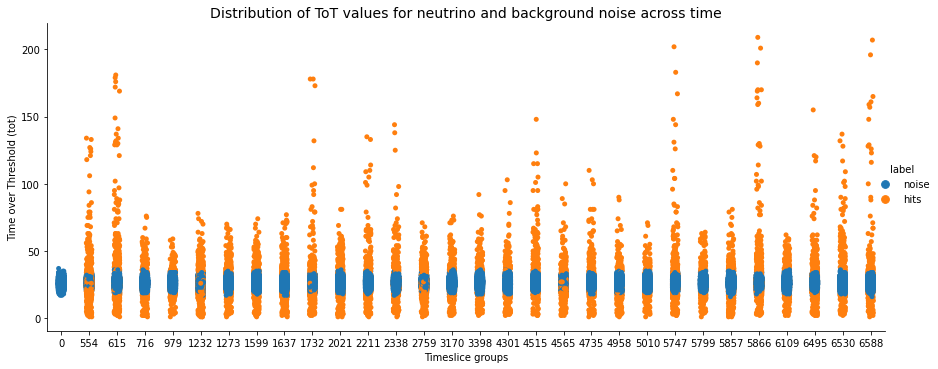

In [161]:
g_tot = sns.catplot(x="group", y="tot",
                    hue="label",
                    aspect=2.5,
                    data=highest_tots_df)
plt.title("Distribution of ToT values for neutrino and background noise across time",
         y=1.5, fontsize=14)

plt.ylabel("Time over Threshold (tot)")
plt.xlabel("Timeslice groups")


new_labels = ['noise', 'hits']
for t, l in zip(g_tot._legend.texts, new_labels): t.set_text(l)
    
plt.savefig("../assets/tot_across_groups.png")

In [163]:
df_tot_hits = df_tot[df_tot.label == 1]
df_tot_hits

,tot,label,group,time
18491,35.0,1,1,28449.0
18493,24.0,1,1,28450.0
18494,12.0,1,1,28450.0
18495,54.0,1,1,28450.0
18496,47.0,1,1,28451.0
...,...,...,...,...
45747430,23.0,1,6665,99980920.0
45747803,26.0,1,6665,99981723.0
45749518,25.0,1,6665,99985448.0
45749719,29.0,1,6665,99985904.0


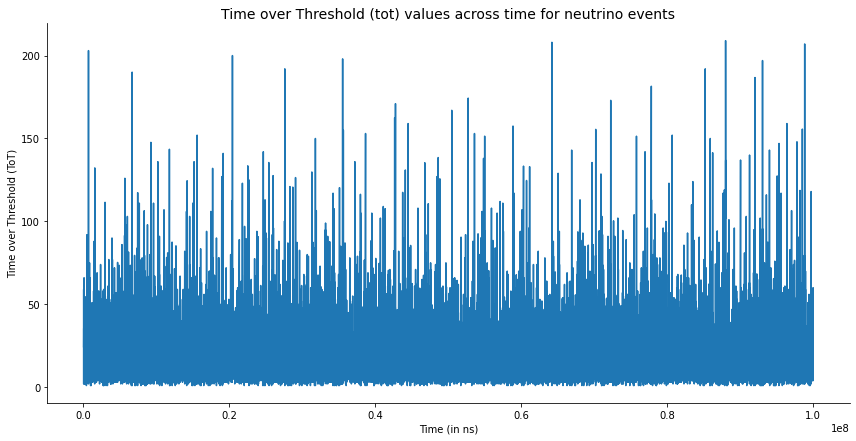

In [172]:
sns.relplot(x="time", y="tot",
            kind="line",
            aspect=2,
            height=6,
            ci=None, data=df_tot_hits)
plt.xlabel("Time (in ns)")
plt.ylabel("Time over Threshold (ToT)")

plt.title("Time over Threshold (tot) values across time for neutrino events",
         y=1, fontsize = 14)

plt.savefig("../assets/tot_hits")

In [176]:
df_tot_noise = df_tot[df_tot.label == 0]

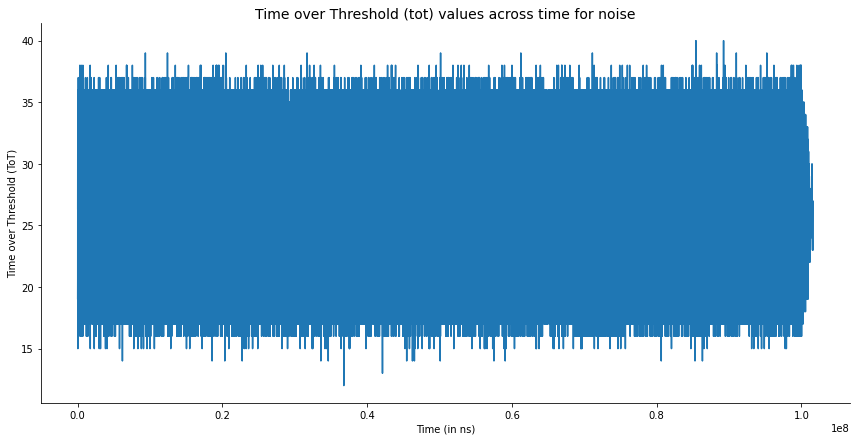

In [177]:
sns.relplot(x="time", y="tot",
            kind="line",
            aspect=2,
            height=6,
            ci=None, data= df_tot_noise)
plt.xlabel("Time (in ns)")
plt.ylabel("Time over Threshold (ToT)")

plt.title("Time over Threshold (tot) values across time for noise",
         y=1, fontsize = 14)

plt.savefig("../assets/tot_noise")

# xyt, xzt, yzt Ensemble

In [108]:
plot_groups = df_only_hits.group[:2]
top_hits = data[data.group.isin(plot_groups)]

In [22]:
g_0 = data[data.group == 0]

In [17]:
g_615 = data[data.group == 615]

In [1]:
fig1 = go.Scatter3d(x=g_0.pos_x,
                    y=g_0.pos_y,
                    z=g_0.time,
                    marker=dict(opacity=0.9,
                                reversescale=True,
                                colorscale='Blues',
                                size=5),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict(title="pos-x"),
                                yaxis=dict(title="pos-y"),
                                zaxis=dict(title="time")),)

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("../assets/g_0_xyt.html"))

NameError: name 'go' is not defined

In [57]:
fig1 = go.Scatter3d(x=g_615.pos_x,
                    y=g_615.pos_y,
                    z=g_615.time,
                    marker=dict(opacity=0.9,
                                reversescale=True,
                                colorscale='Blues',
                                size=5),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict(title="pos-x"),
                                yaxis=dict(title="pos-y"),
                                zaxis=dict(title="time")),)

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("../assets/g_615_xyt.html"))

'../assets/g_615_xyt.html'

In [56]:
fig1 = go.Scatter3d(x=top_hits.pos_x,
                    y=top_hits.pos_y,
                    z=top_hits.time,
                    marker=dict(opacity=0.9,
                                reversescale=True,
                                colorscale='Blues',
                                size=5),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict(title="pos-x"),
                                yaxis=dict(title="pos-y"),
                                zaxis=dict(title="time")),)

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("../assets/top_hits_groups_xyt.html"))

'../assets/top_hits_groups_xyt.html'

We should calculate the time difference between hits and use that as the fourth dimension

In [77]:
g_0['time_diff'] = g_0['time'].diff()
g_0['time_diff'] =  g_0['time_diff'].fillna(0)


g_615['time_diff'] = g_615['time'].diff()
g_615['time_diff'] =  g_615['time_diff'].fillna(0)

/Users/shrutirao/Documents/Coding/Thesis/km3net/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/shrutirao/Documents/Coding/Thesis/km3net/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/shrutirao/Documents/Coding/Thesis/km3net/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [85]:
#Set marker properties
markercolor = g_0.time_diff

#Make Plotly figure
fig1 = go.Scatter3d(x=g_0.pos_x,
                    y=g_0.pos_y,
                    z=g_0.pos_z,
                    marker=dict(color=markercolor,
                                colorbar=dict(title="Colorbar"),
                                opacity=1,
                                reversescale=True,
                                colorscale='Blues',
                                size=5),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict(title="pos-x"),
                                yaxis=dict(title="pos-y"),
                                zaxis=dict(title="pos-z")),)

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("../assets/g_0_4d_plot_with_time_diff.html")
                   )

'../assets/g_0_4d_plot_with_time_diff.html'

In [86]:
#Set marker properties
markercolor = g_615.time_diff

#Make Plotly figure
fig1 = go.Scatter3d(x=g_615.pos_x,
                    y=g_615.pos_y,
                    z=g_615.pos_z,
                    marker=dict(color=markercolor,
                                colorbar=dict(title="Colorbar"),
                                opacity=1,
                                reversescale=True,
                                colorscale='Blues',
                                size=5),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict(title="pos-x"),
                                yaxis=dict(title="pos-y"),
                                zaxis=dict(title="pos-z")),)

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("../assets/g_615_4d_plot_with_time_diff.html")
                   )

'../assets/g_615_4d_plot_with_time_diff.html'

In [113]:
# time vs label

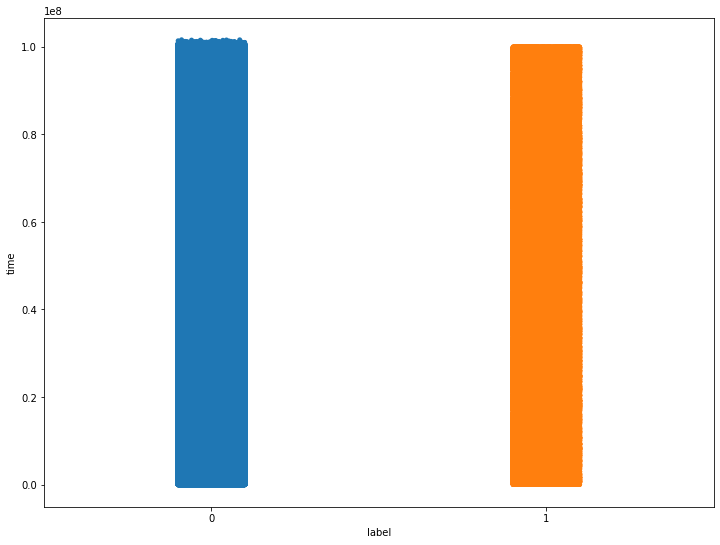

In [132]:
f, ax = plt.subplots(figsize=(12, 9))

sns.stripplot(x='label', y="time",
                data=data)

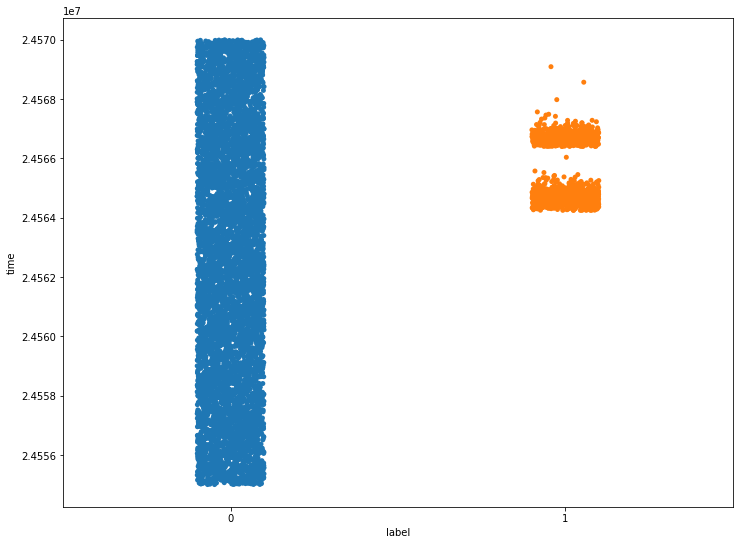

In [192]:
f, ax = plt.subplots(figsize=(12, 9))

sns.stripplot(x='label', y="time",
                data=g_615)

In [ ]:
df_only_noise
noise = data[data.group.isin(df_only_noise.groups)]

In [169]:
test=data.groupby(['group','label']).count()

In [172]:
test = test.reset_index(level=1)['label']

group
0       AxesSubplot(0.125,0.125;0.775x0.755)
1       AxesSubplot(0.125,0.125;0.775x0.755)
2       AxesSubplot(0.125,0.125;0.775x0.755)
3       AxesSubplot(0.125,0.125;0.775x0.755)
4       AxesSubplot(0.125,0.125;0.775x0.755)
                        ...                 
6765    AxesSubplot(0.125,0.125;0.775x0.755)
6766    AxesSubplot(0.125,0.125;0.775x0.755)
6767    AxesSubplot(0.125,0.125;0.775x0.755)
6769    AxesSubplot(0.125,0.125;0.775x0.755)
6772    AxesSubplot(0.125,0.125;0.775x0.755)
Name: label, Length: 6759, dtype: object

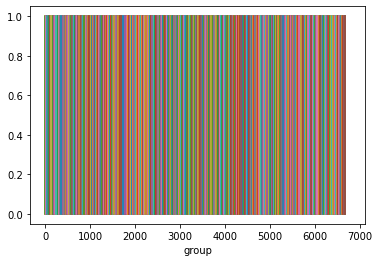

In [184]:
test.groupby('group').plot()

In [19]:
g_615

,dom_id,pmt_id,pos_x,pos_y,pos_z,dir_x,dir_y,dir_z,tot,time,label,group
4227660,1831.0,26.0,48.363,-24.102,83.611,0.719,0.415,0.558,31.0,9225002.0,0,615
4227661,264.0,19.0,-37.784,30.774,94.341,0.827,-0.478,-0.296,26.0,9225007.0,0,615
4227662,682.0,31.0,-75.557,-6.893,56.111,0.719,-0.415,0.558,29.0,9225008.0,0,615
4227663,1032.0,6.0,-27.018,-60.655,150.731,0.000,-0.531,-0.847,31.0,9225013.0,0,615
4227664,2058.0,8.0,76.914,-77.120,150.789,0.831,0.000,-0.556,26.0,9225014.0,0,615
...,...,...,...,...,...,...,...,...,...,...,...,...
4236138,1339.0,3.0,50.125,12.122,139.831,0.000,0.531,-0.847,26.0,9239990.0,0,615
4236139,194.0,18.0,-74.918,65.066,74.041,0.000,-0.955,-0.296,29.0,9239993.0,0,615
4236140,695.0,26.0,-94.292,-6.028,103.911,0.719,0.415,0.558,30.0,9239996.0,0,615
4236141,620.0,10.0,11.829,13.744,130.489,-0.415,0.720,-0.556,26.0,9239998.0,0,615


In [23]:
fig1 = go.Scatter3d(x=g_0.pos_x,
                    y=g_0.pos_y,
                    z=g_0.time,
                    marker=dict(opacity=0.9,
                                reversescale=True,
                                colorscale='Blues',
                                size=5),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict(title="pos-x"),
                                yaxis=dict(title="pos-y"),
                                zaxis=dict(title="time")),)

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True)

'temp-plot.html'

# Time and Label

In [107]:
hits_2 = data[data.group.isin(df_only_hits.group[1:2])][['time', 'group', 'label']]

In [82]:
hits=hits[hits.label == 1]

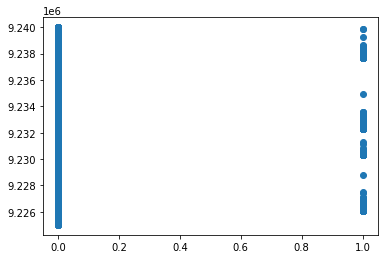

In [105]:
plt.scatter(y=hits.time, x=hits.label)

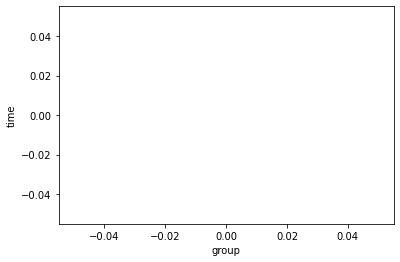

In [90]:
sns.lineplot(x="group", y="time", data=noise)

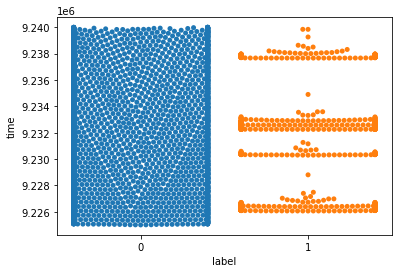

In [106]:
sns.swarmplot(x="label", y="time", data=hits)

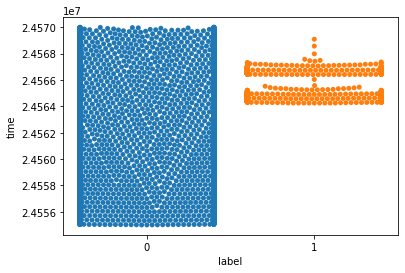

In [108]:
sns.swarmplot(x="label", y="time", data=hits_2)

# 

In [109]:
hits_2 = data[data.group.isin(df_only_hits.group[1:2])][['pos_x', 'group', 'label']]

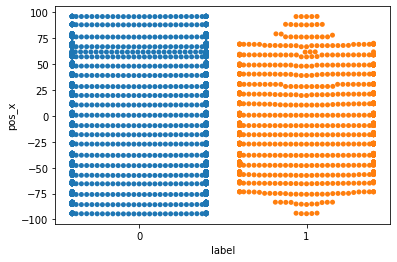

In [110]:
sns.swarmplot(x="label", y="pos_x", data=hits_2)

In [111]:
hits_2 = data[data.group.isin(df_only_hits.group[1:2])][['pos_y', 'group', 'label']]

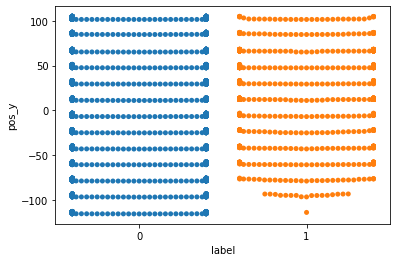

In [112]:
sns.swarmplot(x="label", y="pos_y", data=hits_2)

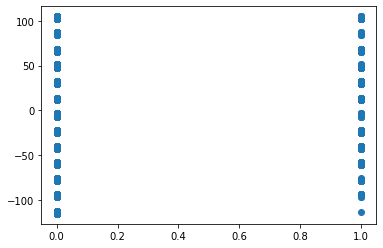

In [113]:
plt.scatter(x="label", y="pos_y", data=hits_2)

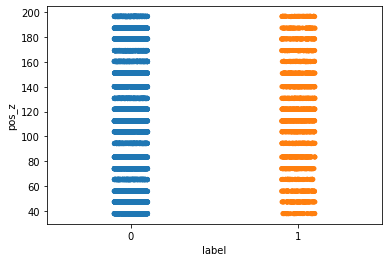

In [130]:
hits_2 = data[data.group.isin(df_only_hits.group[1:2])][['pos_z', 'group', 'label']]
sns.stripplot(x="label", y="pos_z", data=hits_2)

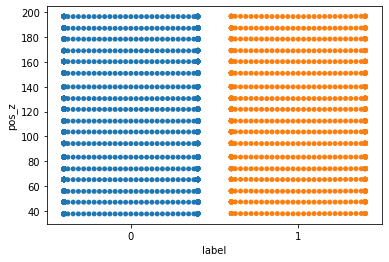

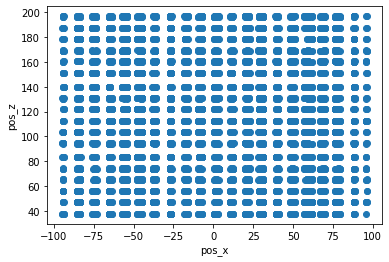

In [127]:
hits_2 = data[data.group.isin(df_only_hits.group[1:2])][['pos_z', 'pos_x', 'label']]
plt.scatter(x="pos_x", y="pos_z", data=hits_2)
plt.xlabel("pos_x")
plt.ylabel("pos_z")
plt.savefig("../assets/extra/x_z")

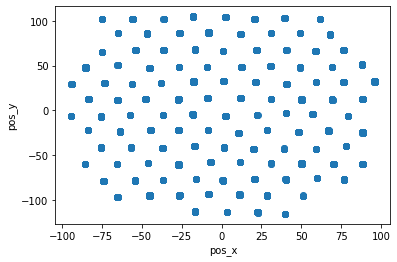

In [128]:
hits_2 = data[data.group.isin(df_only_hits.group[1:2])][['pos_y', 'pos_x', 'label']]
plt.scatter(x="pos_x", y="pos_y", data=hits_2)
plt.xlabel("pos_x")
plt.ylabel("pos_y")
plt.savefig("../assets/extra/x_y")

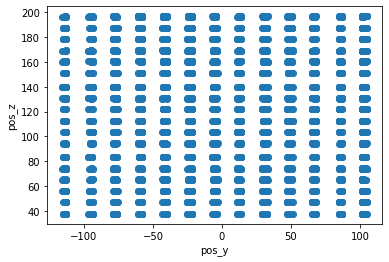

In [129]:
hits_2 = data[data.group.isin(df_only_hits.group[1:2])][['pos_y', 'pos_z', 'label']]
plt.scatter(x="pos_y", y="pos_z", data=hits_2)
plt.xlabel("pos_y")
plt.ylabel("pos_z")
plt.savefig("../assets/extra/y_z")

In [133]:
poo = data.groupby('group').count()

In [137]:
poo[-40:]

,dom_id,pmt_id,pos_x,pos_y,pos_z,dir_x,dir_y,dir_z,tot,time,label
group,,,,,,,,,,,
6719,33,33,33,33,33,33,33,33,33,33,33
6720,19,19,19,19,19,19,19,19,19,19,19
6721,26,26,26,26,26,26,26,26,26,26,26
6722,24,24,24,24,24,24,24,24,24,24,24
6723,15,15,15,15,15,15,15,15,15,15,15
6724,17,17,17,17,17,17,17,17,17,17,17
6725,17,17,17,17,17,17,17,17,17,17,17
6726,17,17,17,17,17,17,17,17,17,17,17
6727,5,5,5,5,5,5,5,5,5,5,5
